# Introduction

This project is for the University of Colorado Boulder

by Matthew Cramer

The real estate industry has been growing exponentially in recent years, with housing prices becoming increasingly high. Accurately predicting the prices of houses is a crucial task for buyers, sellers, and real estate agents. However, predicting the prices of houses accurately can be a challenging task, as the prices can vary based on a multitude of factors such as location, square footage, number of bedrooms and bathrooms, age of the property, and more.

To tackle this problem, machine learning models can be trained to predict the prices of houses based on a set of features. In this project, we will be exploring different supervised learning regression models and comparing their performance in predicting the prices of houses. We will be using the House Prices Advanced Regression Techniques Kaggle dataset, which contains information about various features of residential homes sold in Ames, Iowa.

We will start by performing exploratory data analysis to gain insights into the relationships between the features and the target variable (sale price). Next, we will preprocess and clean the data, handling missing values, and encoding categorical variables. We will then split the dataset into training and validation sets and standardize the data.

We will then train and evaluate multiple regression models, including linear regression, SVM, decision tree regressor and random forest regressor. We will use accuracy scores of the model as the evaluation metric and compare the models' performance in predicting the sale price.

The goal of this project is to identify the best-performing model for predicting the sale price of residential homes. This will help buyers and sellers make more informed decisions about the pricing of their properties and help real estate agents provide more accurate valuations.

## Data Preprocessing

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
# Getting rid of the non useful ID column
data.drop('Id', axis=1, inplace=True)


# show the change with the ID column removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

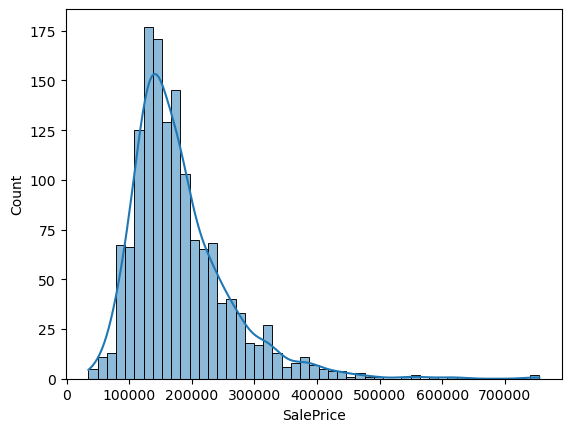

In [81]:
# show the histogram of the different prices 
sns.histplot(x='SalePrice', data=data, kde=True)
plt.show()

In [82]:
feature = np.array(data.columns.to_list())

#find the columns that have many misssing values 
nan_val_col = feature[np.array(data.isnull().sum())>150]

#drop the columns that have these high levels of missing values to simplify the data
data_temp = data.drop(nan_val_col, axis=1)

#show the changes to the columns, we have now gone from 81 to 75 columns 
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

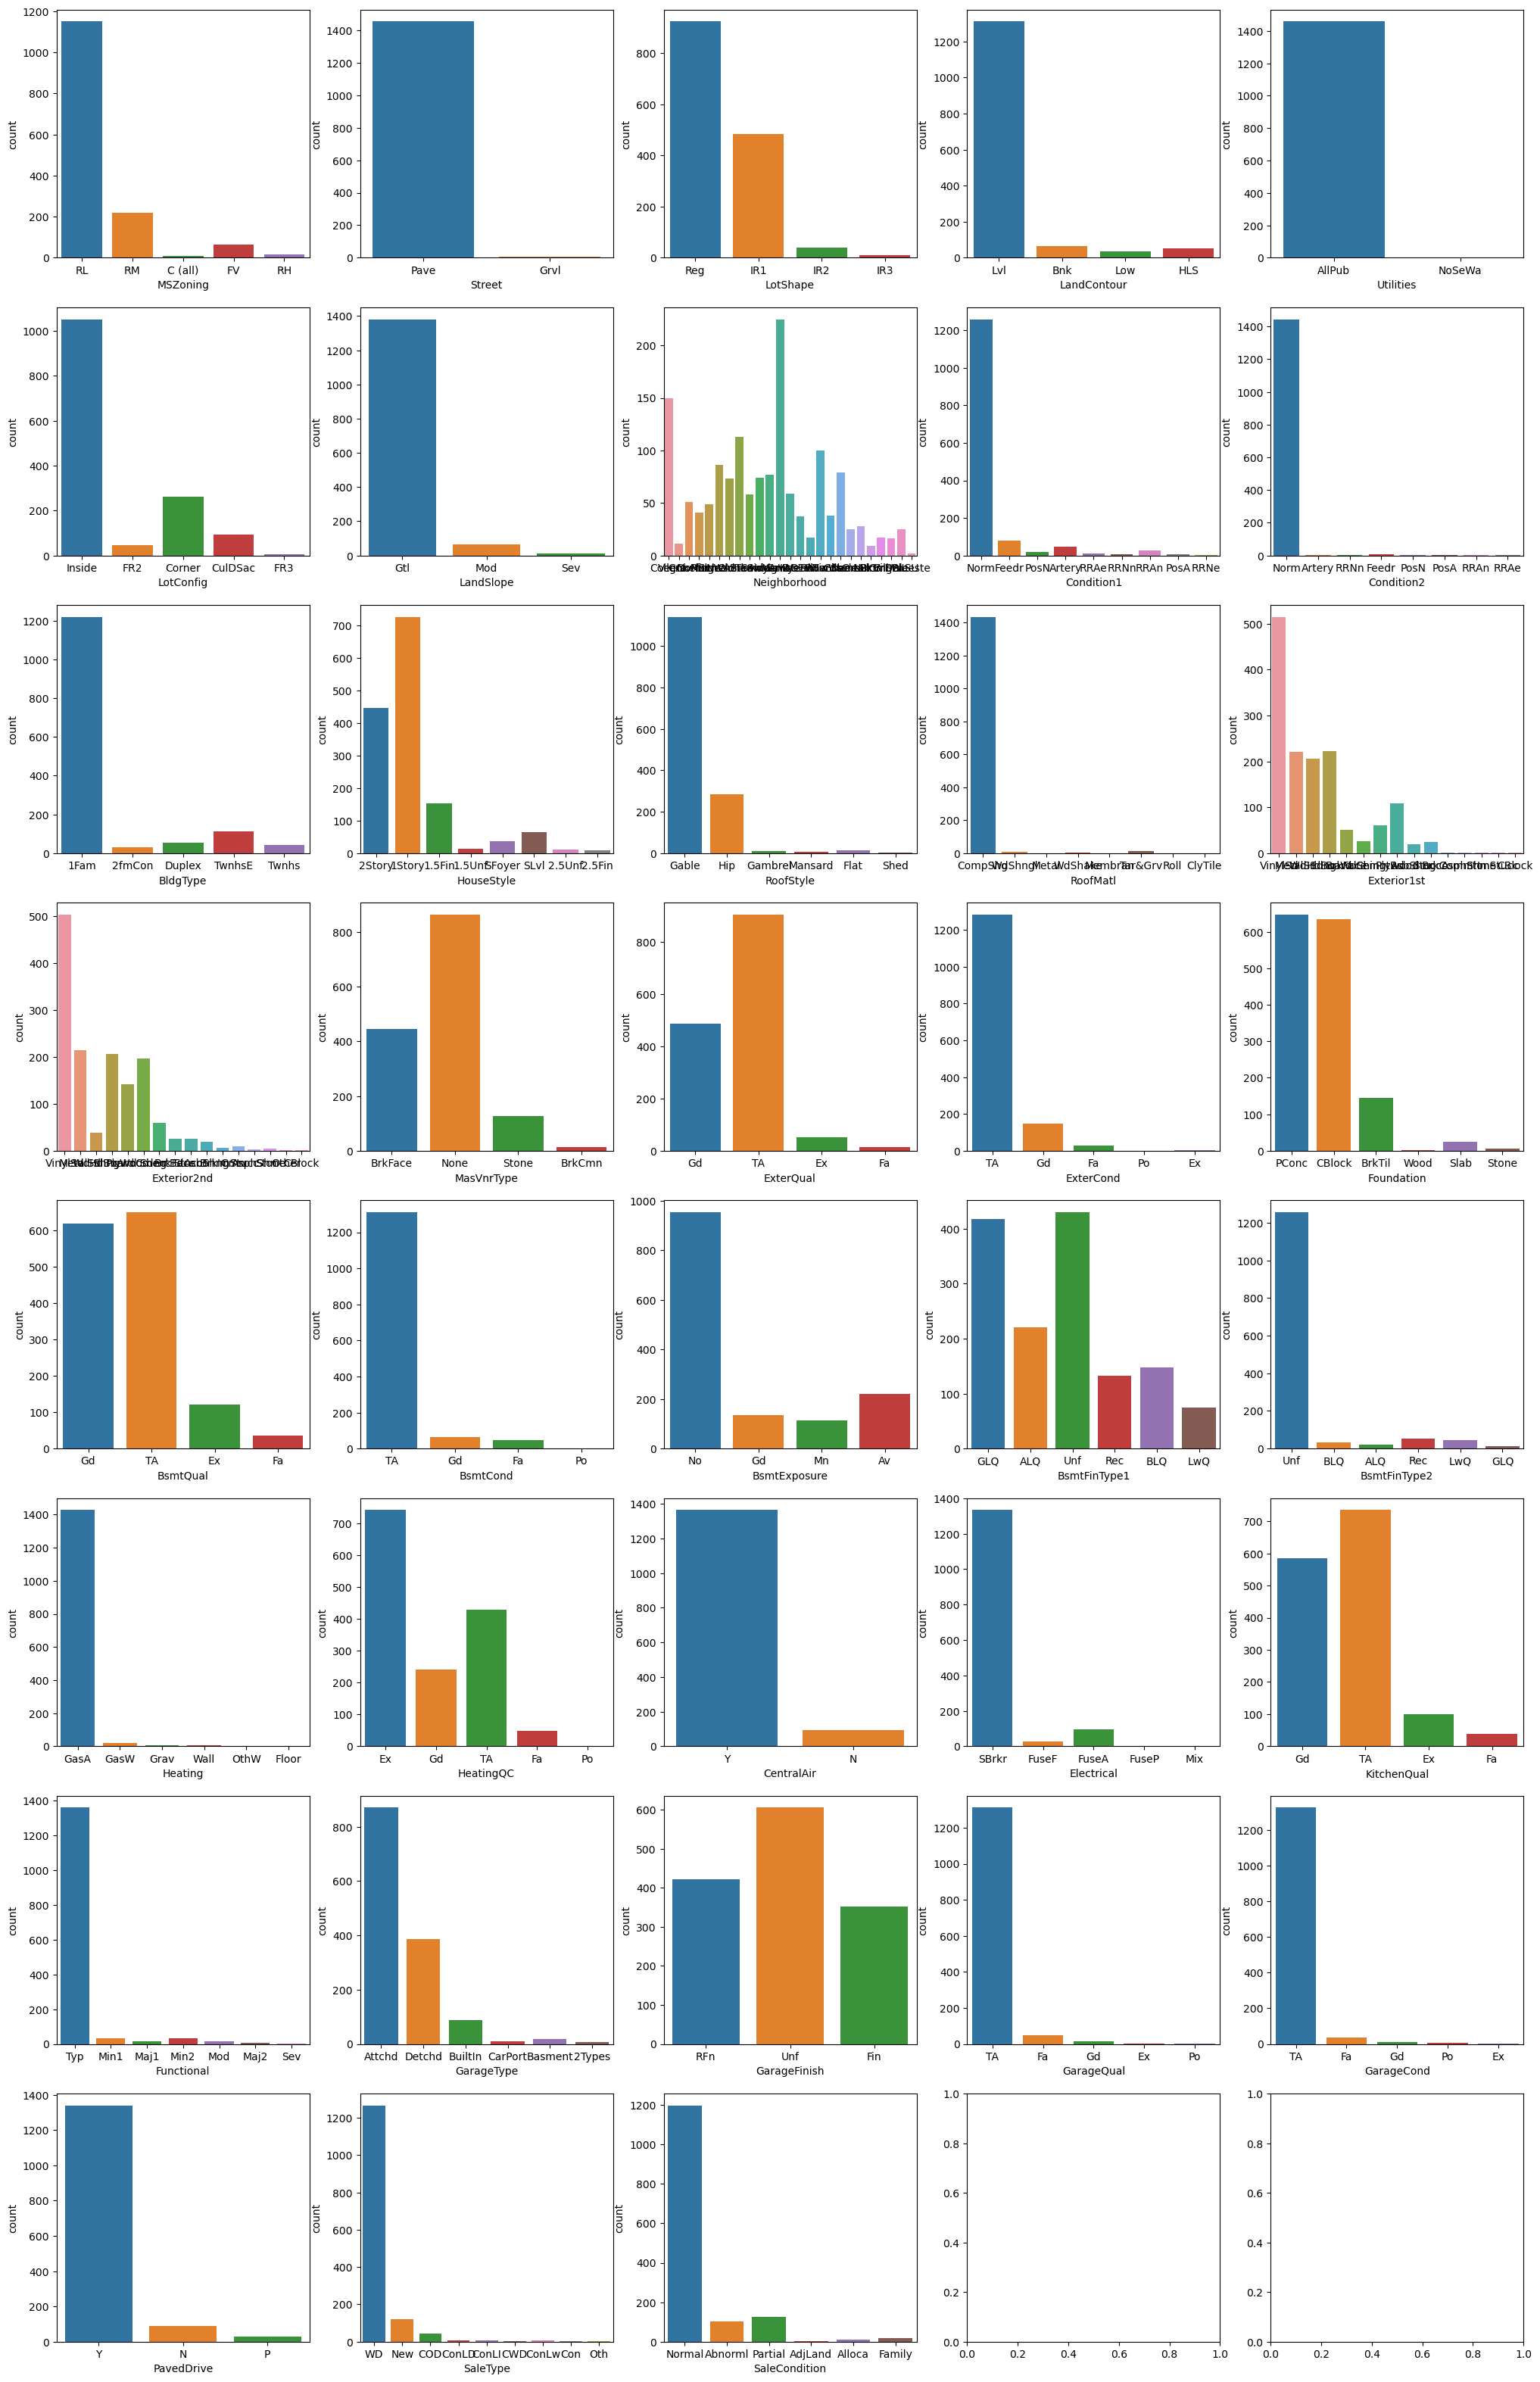

In [83]:
# seperate the features that are object data types from the numeric ones
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

#creating plots of the non-numeric features, we can see many more features that can probably be removed based on how dominate that feature is 
f,ax = plt.subplots(8,5, figsize=(25,40))
k=0
for i in range(8):
    for j in range(5):
        while k<38:
            sns.countplot(x=cat_features[k], data=data_temp, ax=ax[i][j])
            break
        k=k+1

## Dropping Categorical Features
We can see from the above chart that some of the featues are not providing much inormation, either having a value that is highly domininate or having only two possible values, these can be dropped in order to keep only the features that have the most valuable information

In [84]:
#removing the features that only have two options/are not providing value

data_temp.drop(['SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical',
                'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'RoofMatl', 'BldgType', 'Condition2',
                'Condition1', 'LandSlope', 'Utilities', 'LandContour', 'Street'], axis=1, inplace=True)




In [85]:
#Updating features
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

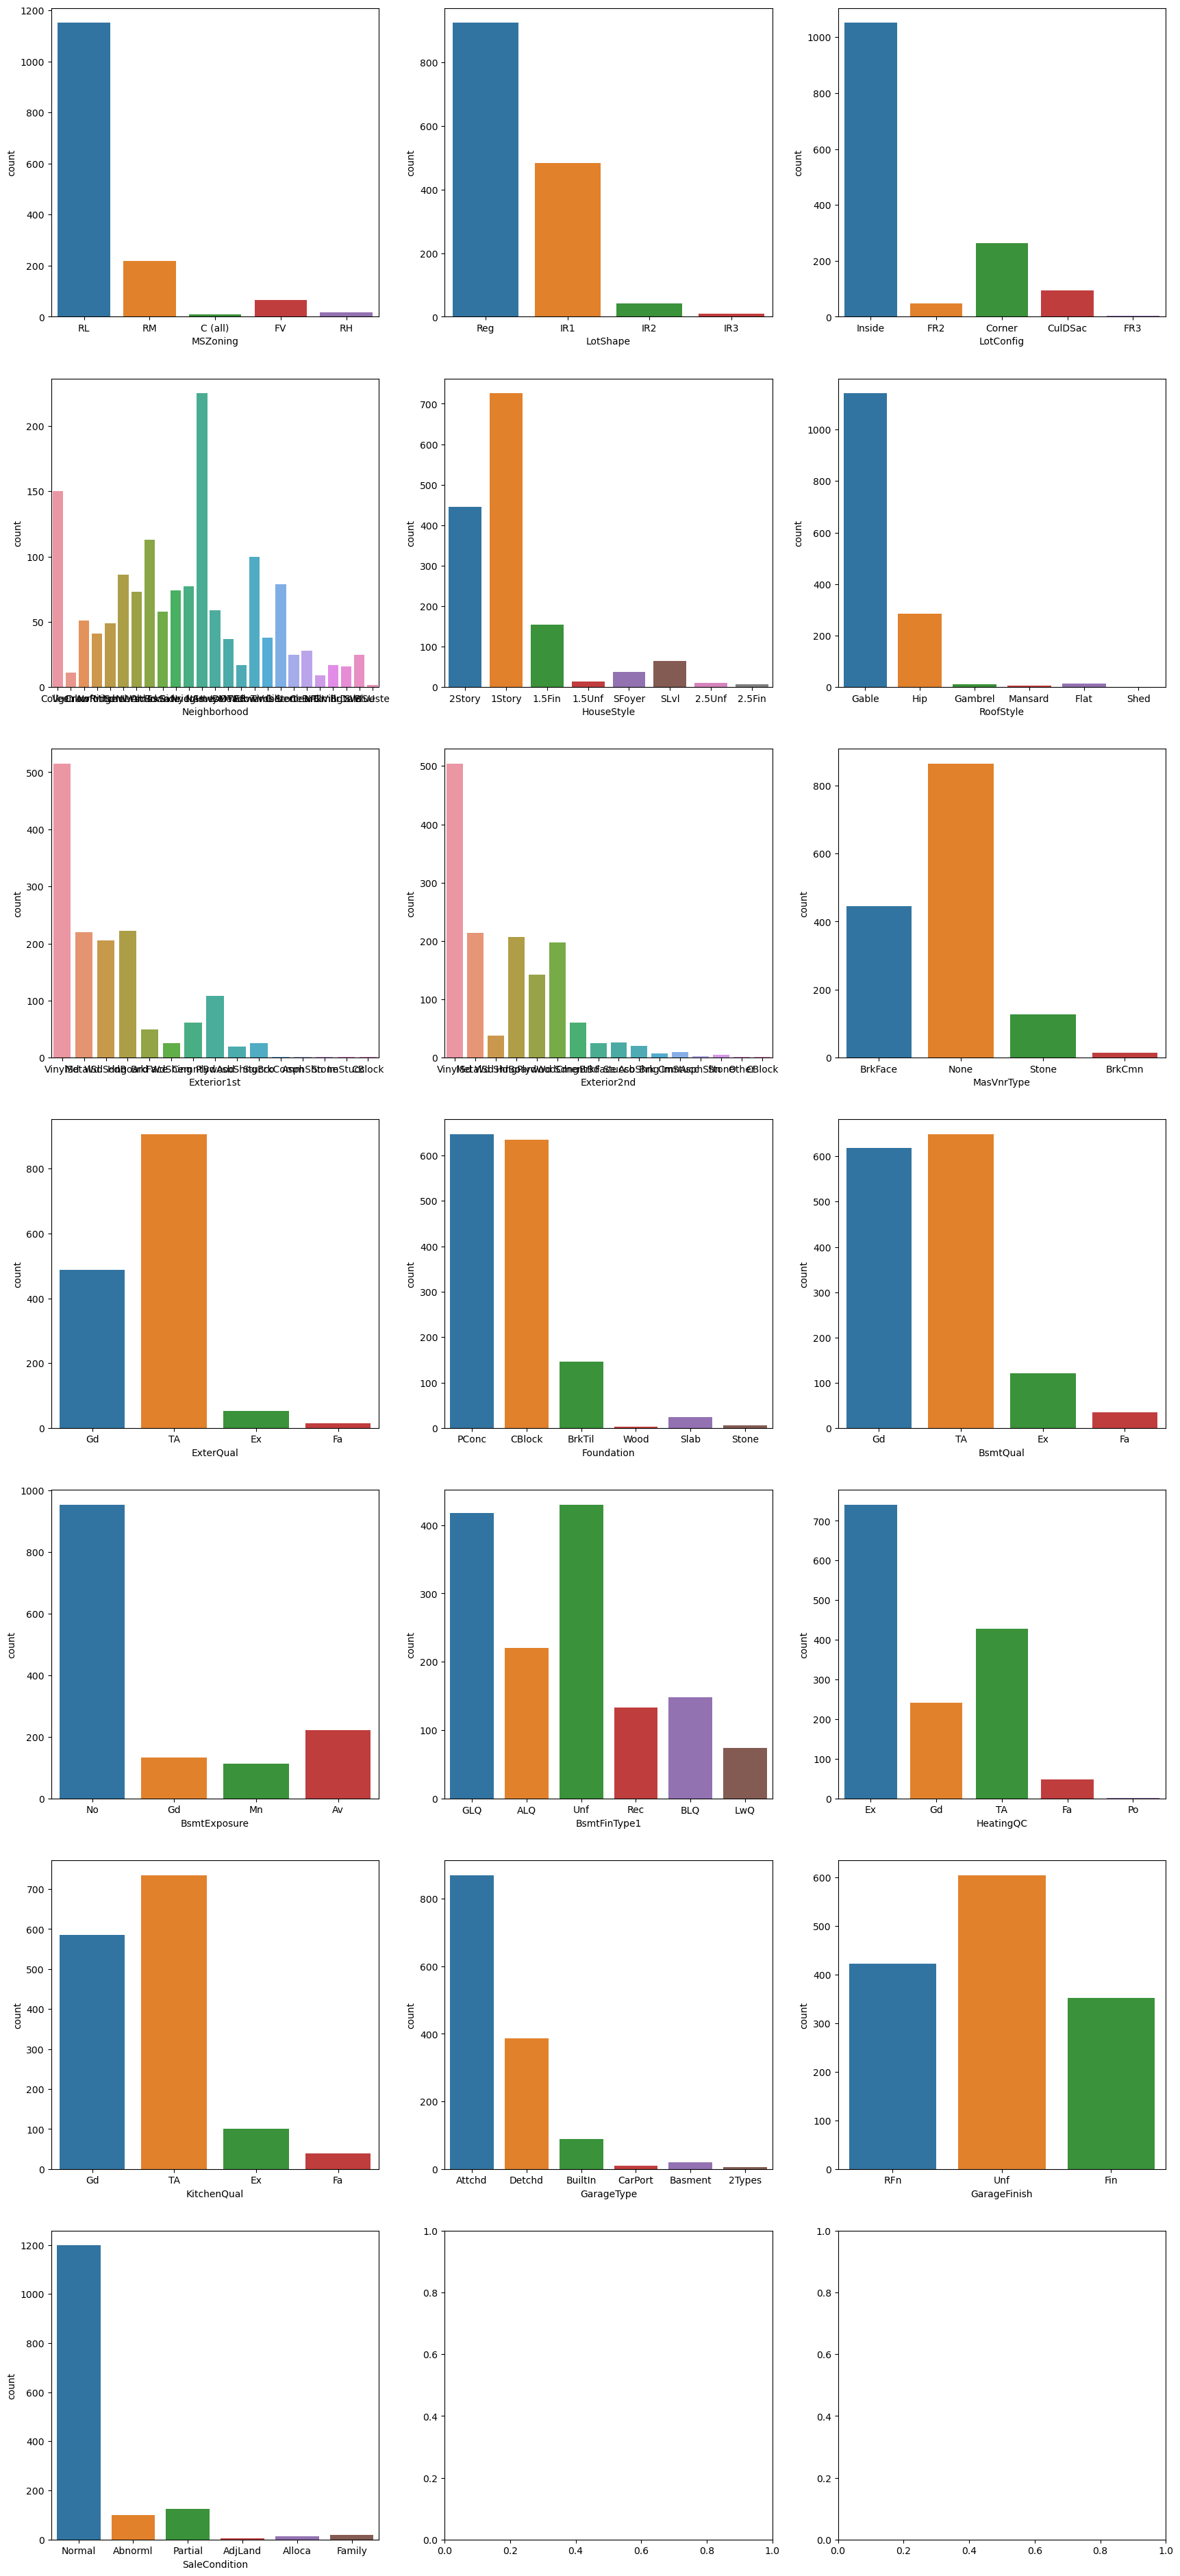

In [86]:

# reprint the plots with only the useful values
f,ax = plt.subplots(7,3, figsize=(21,48))
k=0
for i in range(7):
    for j in range(3):
        while k<19:
            sns.countplot(x=cat_features[k], data=data_temp, ax=ax[i][j])
            break
        k=k+1

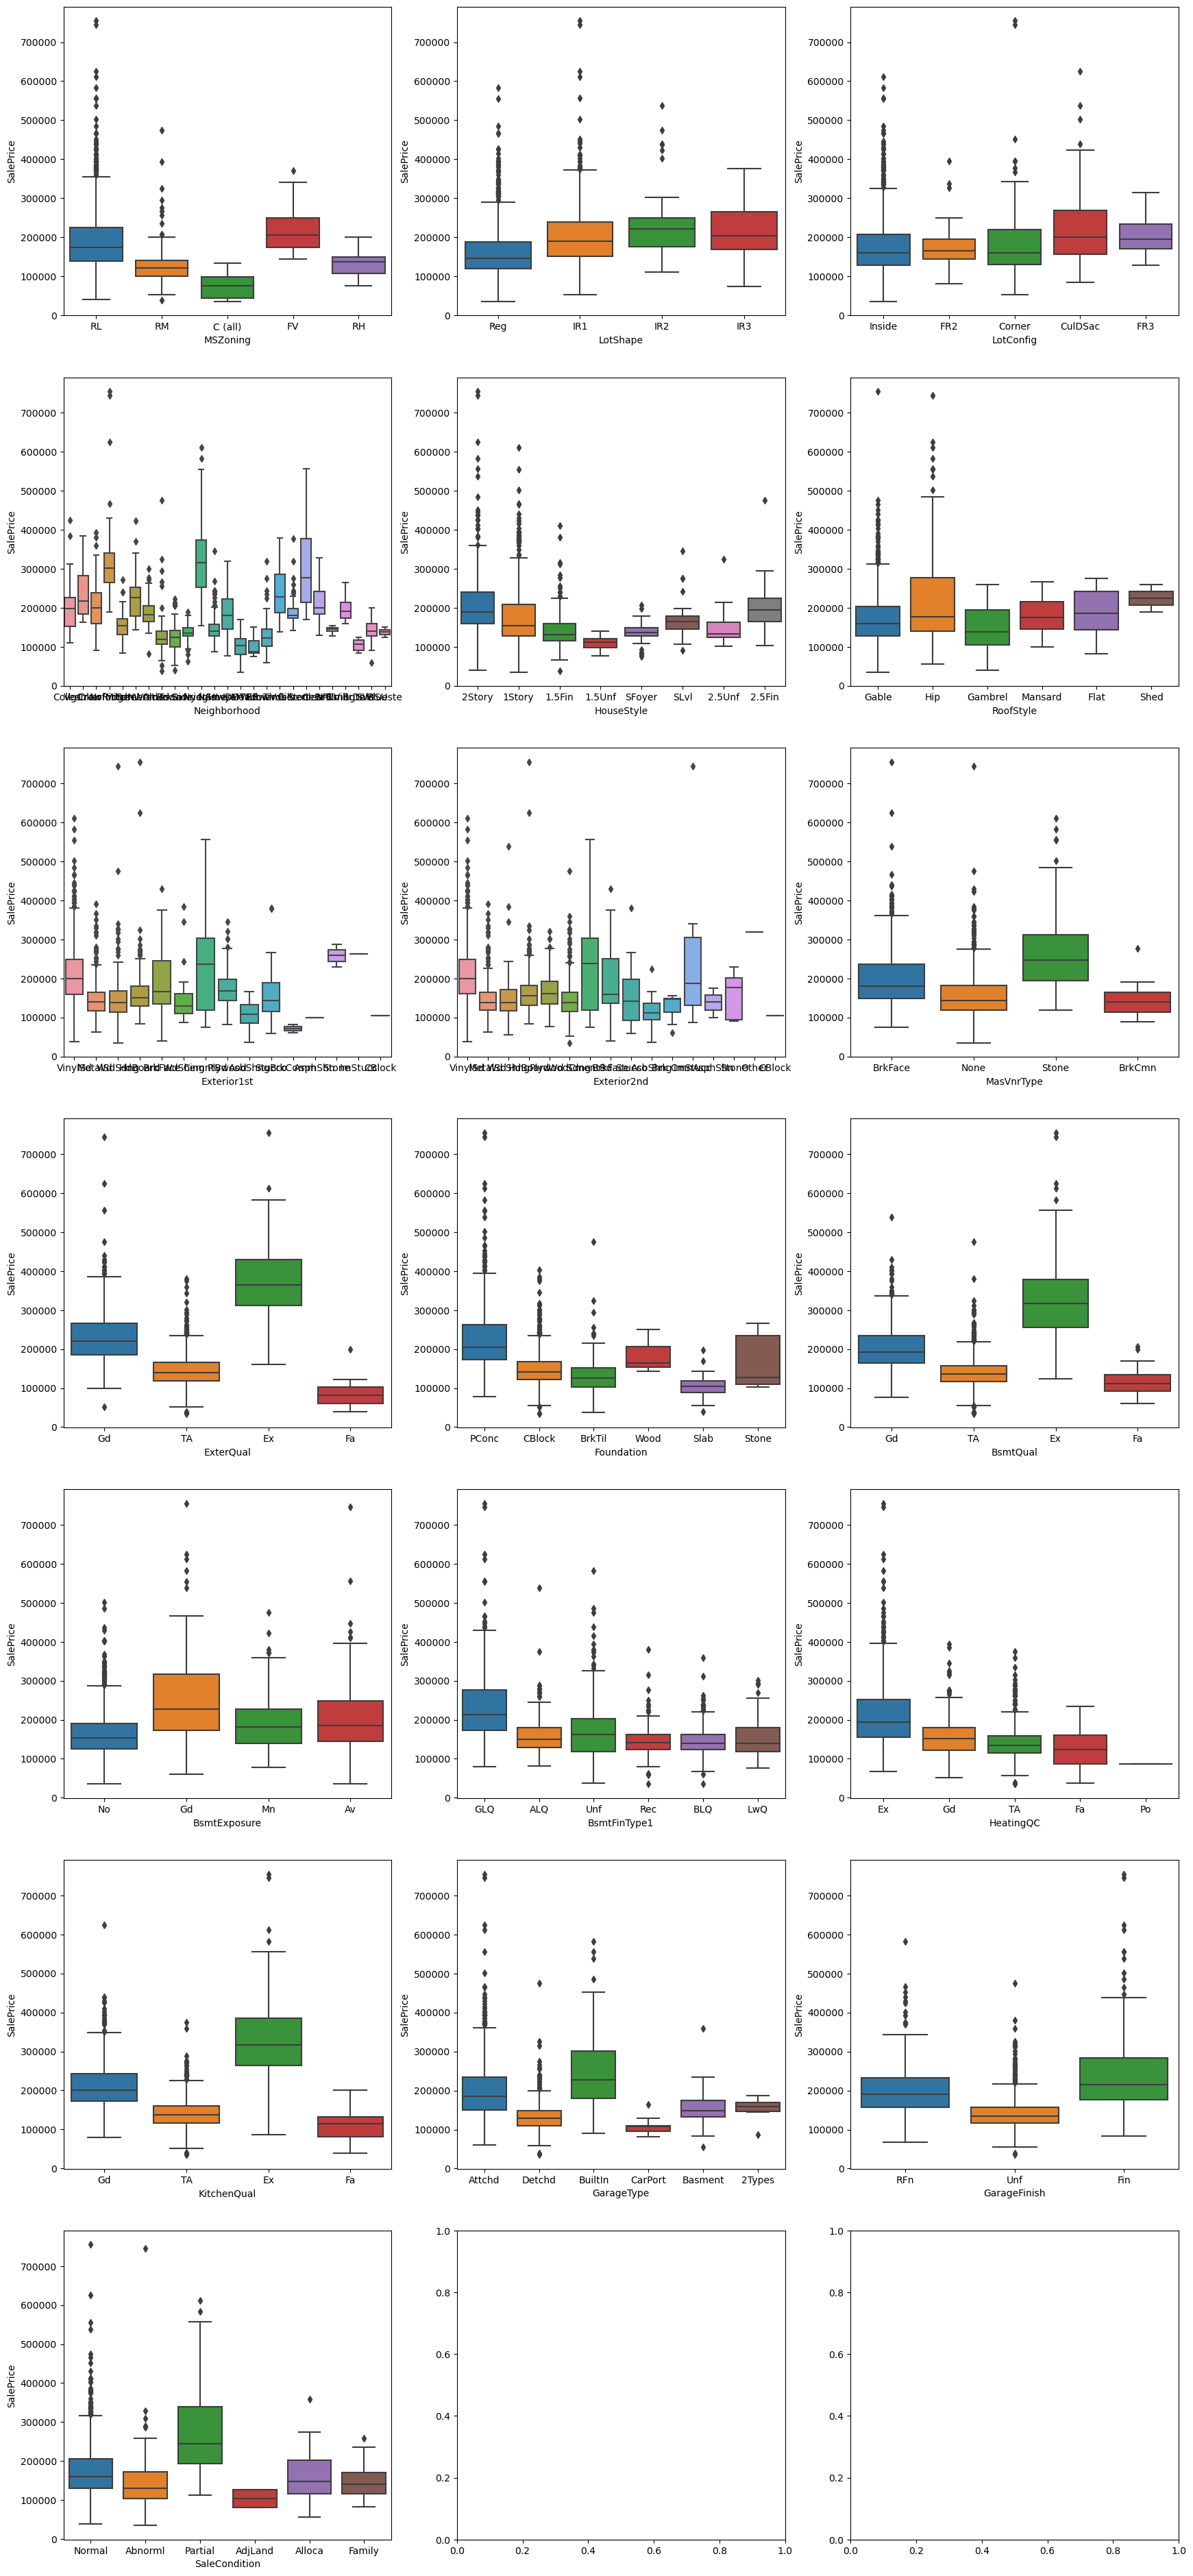

In [87]:
#broken down list of features vs the sales price

f,ax = plt.subplots(7,3, figsize=(21,48))
k=0
for i in range(7):
    for j in range(3):
        while k<19:
            sns.boxplot(x=cat_features[k], y='SalePrice', data=data_temp, ax=ax[i][j])
            break
        k=k+1

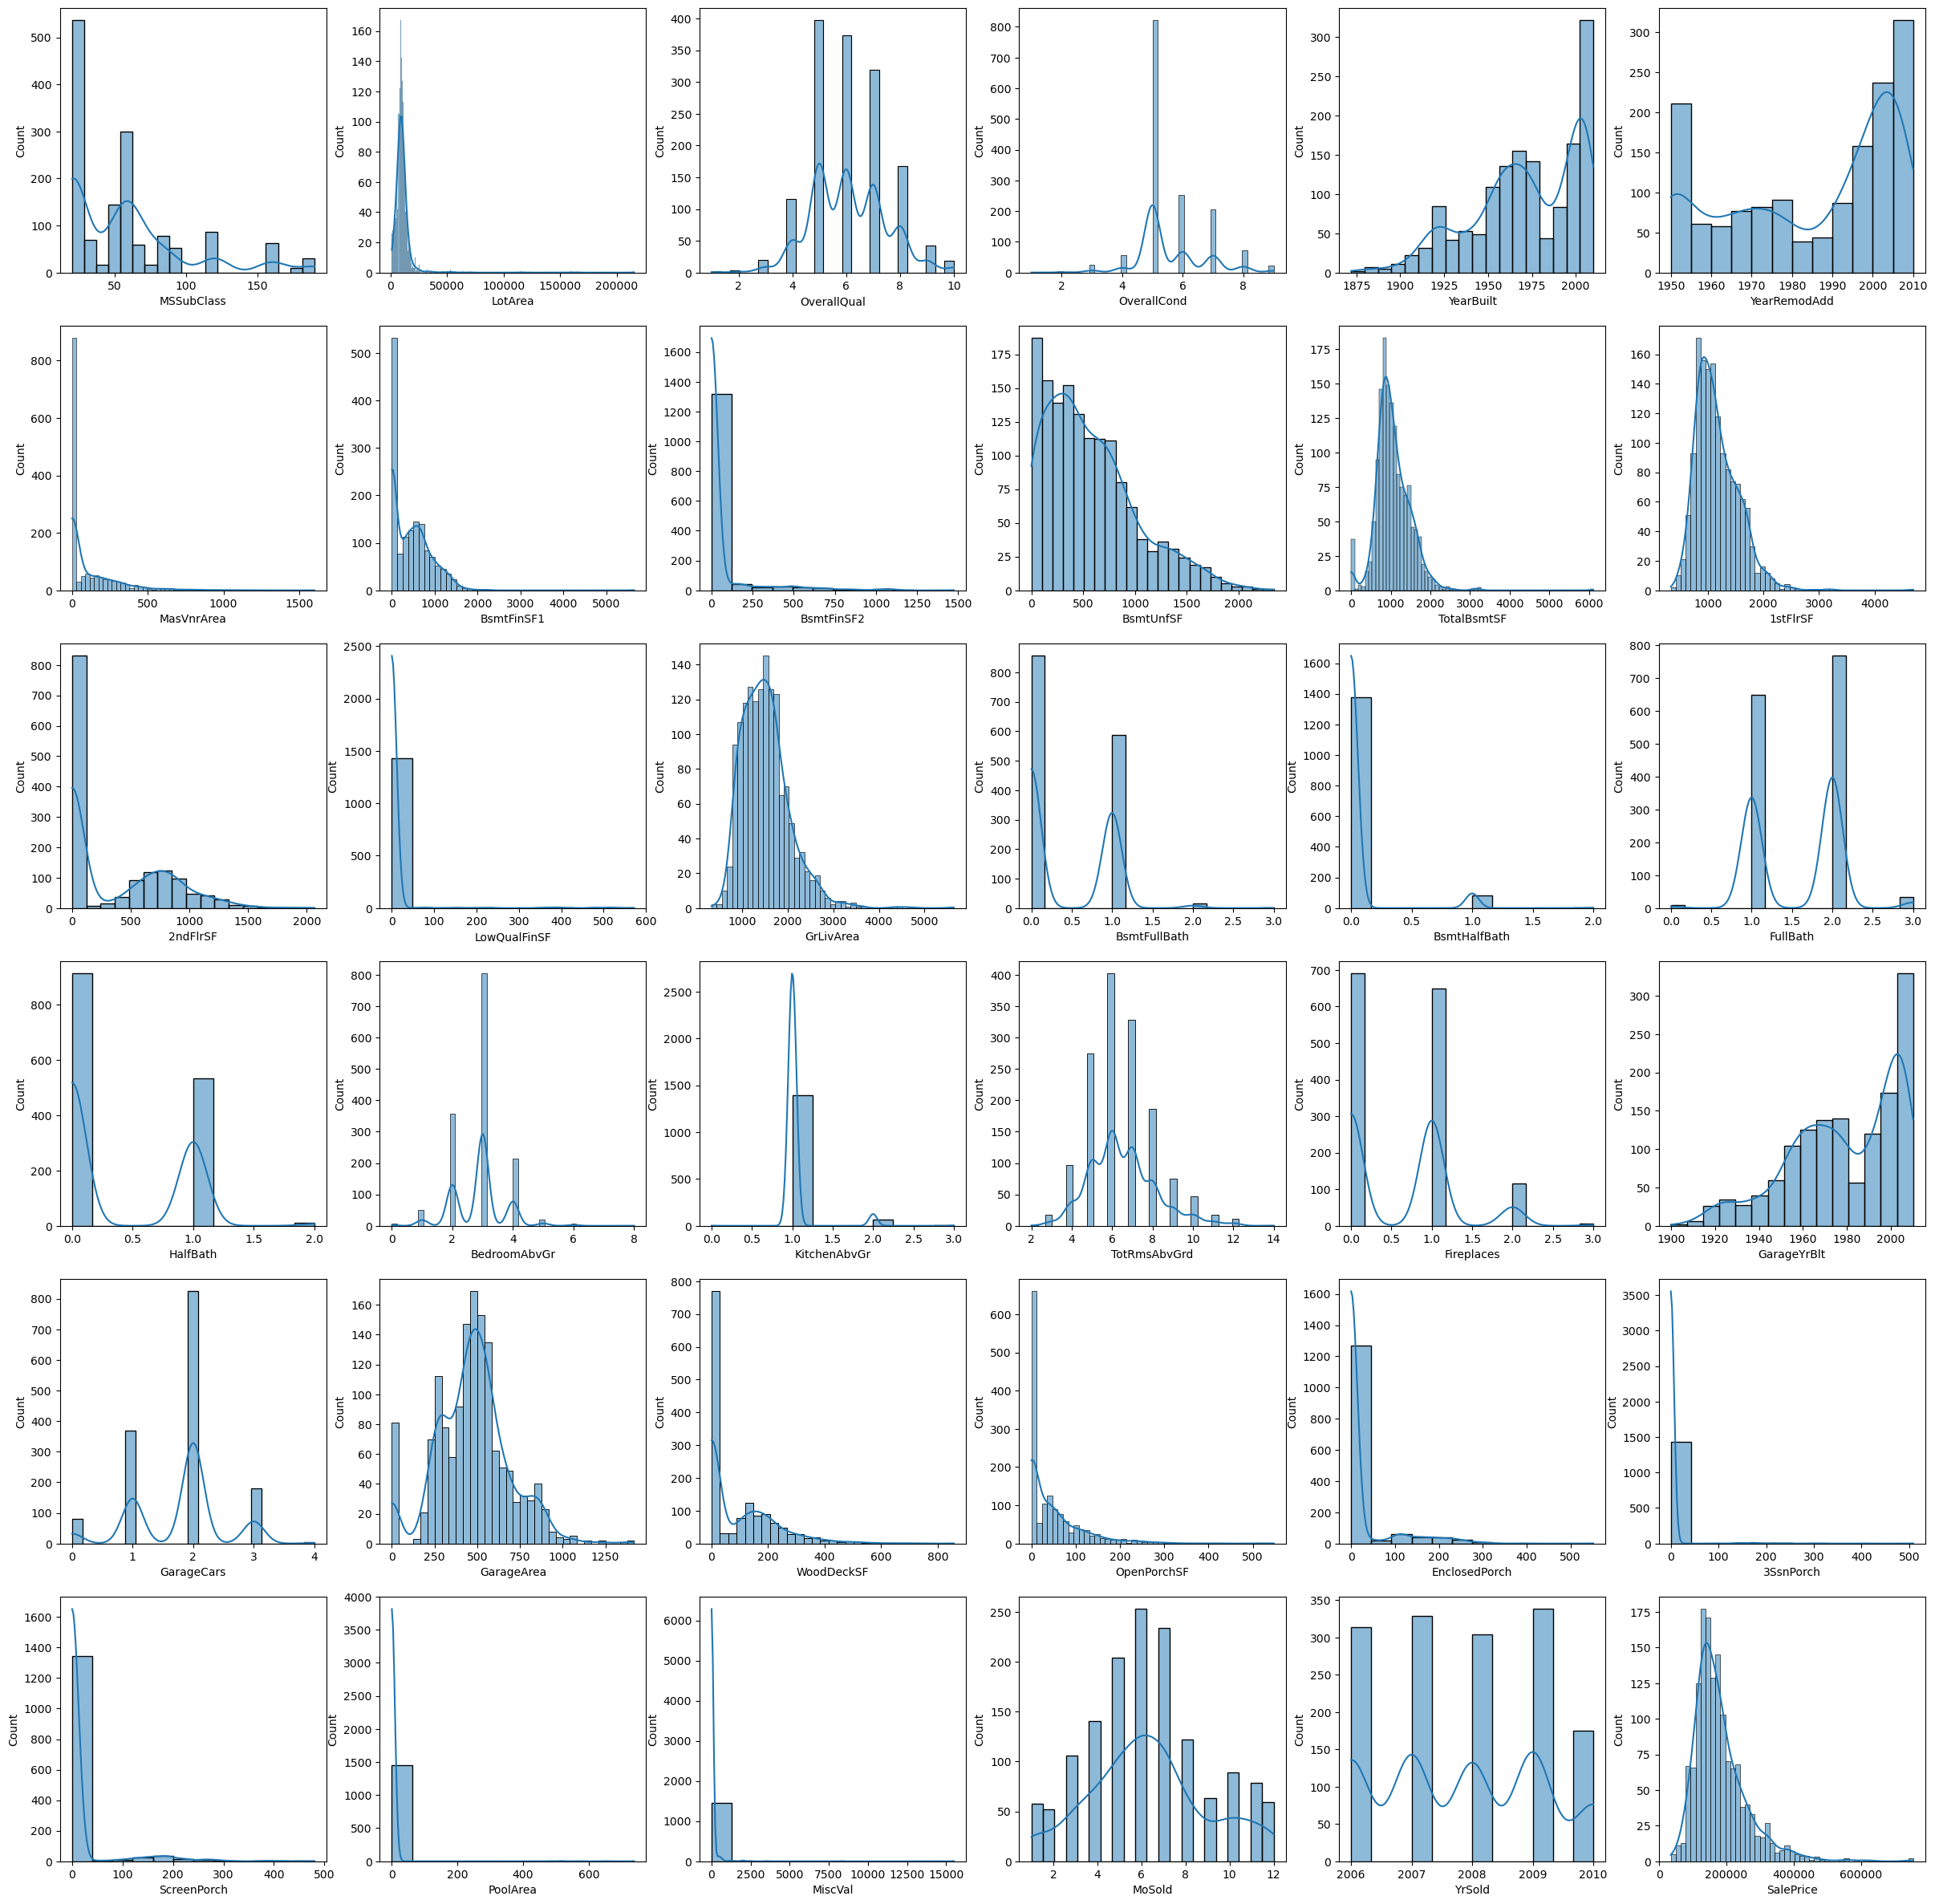

In [88]:
#numeric features vs sales price
f,ax = plt.subplots(6,6, figsize=(30,30))
k=0
for i in range(6):
    for j in range(6):
        while k<36:
            sns.histplot(x=cont_features[k], data=data_temp, kde=True, ax=ax[i][j])
            break
        k=k+1

## Dropping Continious Features

We can see from the above chart that several of the featues have a very small range of effect on the data, we can see that have no or very small ranges of results which allows us to eliminate them to keep our data effective, reducing runtime at no large loss in accuracy.

In [89]:
data_temp.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
                'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath','LowQualFinSF',
                'BsmtFinSF2', 'MasVnrArea', 'BsmtFinSF1'], axis=1, inplace=True)


In [90]:
#update features
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

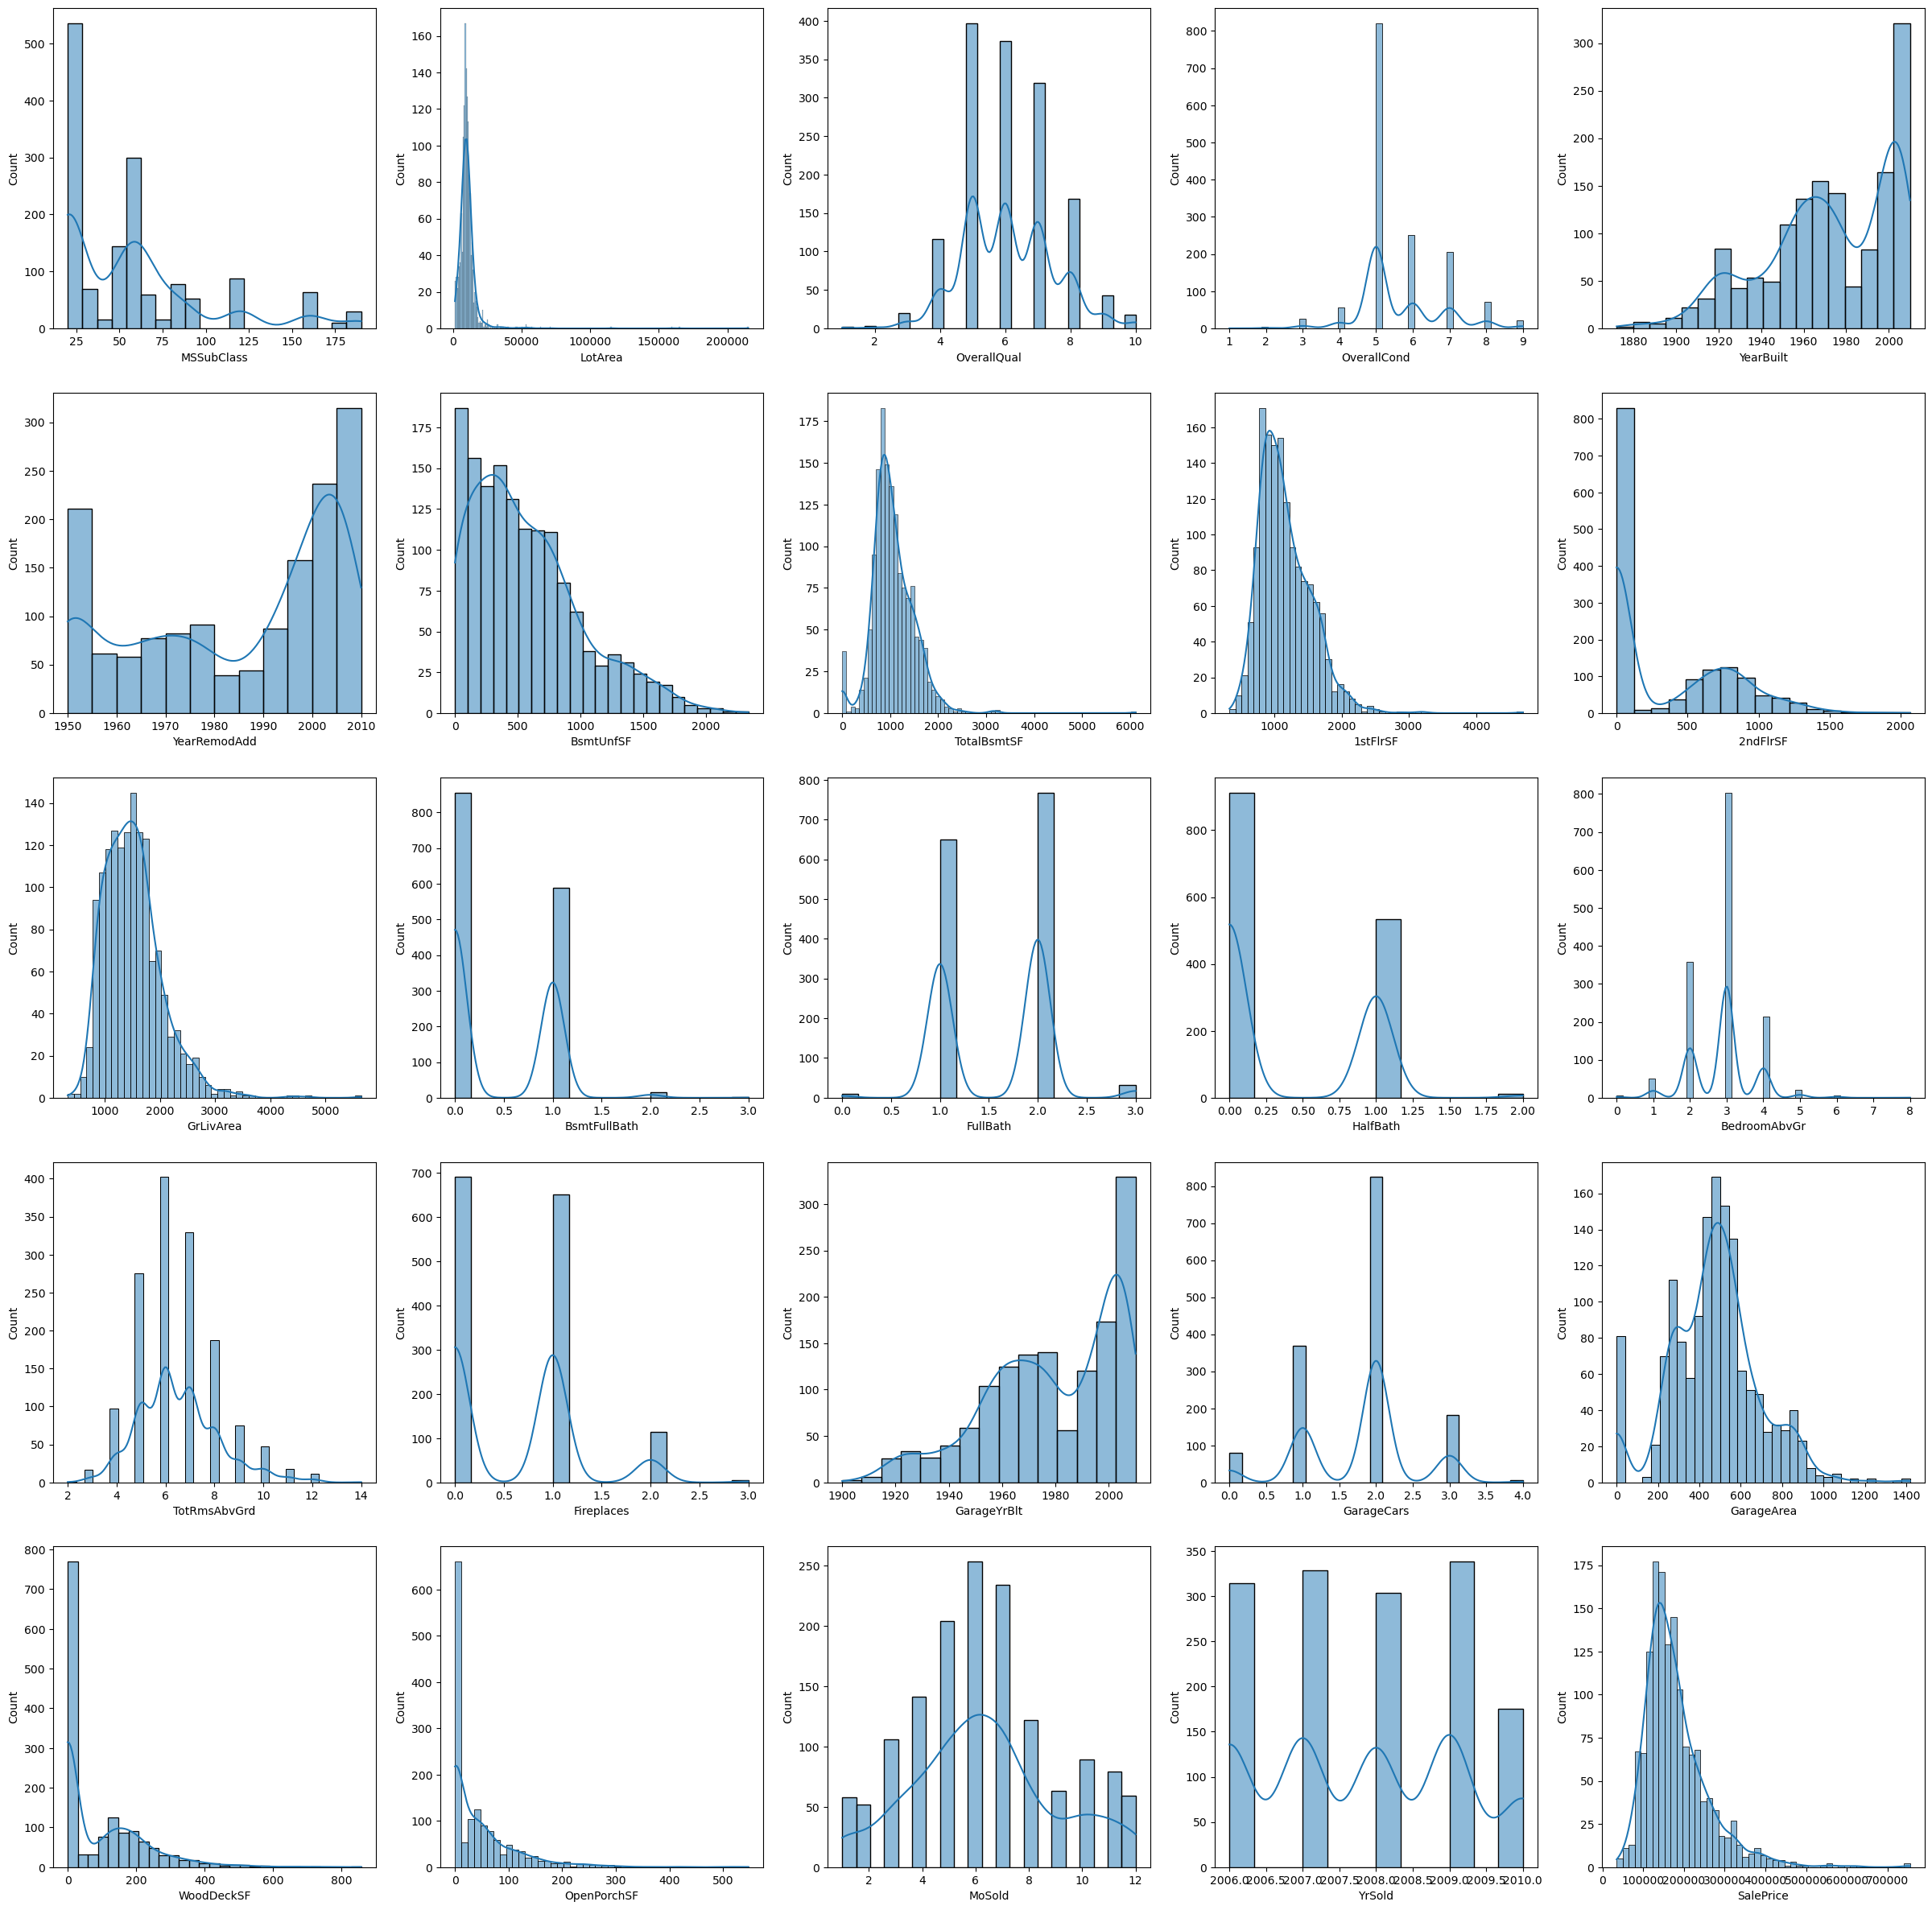

In [91]:
#reprinting graphs with only data relevent to the system
f,ax = plt.subplots(5,5, figsize=(30,30))
k=0
for i in range(5):
    for j in range(5):
        while k<25:
            sns.histplot(x=cont_features[k], data=data_temp, kde=True, ax=ax[i][j])
            break
        k=k+1

## Outlier Handling

By creating boxplots of all the data (below), we can see that there are several outlier values in the numeric catagories that may skew our results and make our model less effective. we need to now identify those points and remove them from our data set. to do this we defined outliers as anything outside of the 25%to 75% rang of our average, this allows us to remove values that are not helpful to the rest of the model.


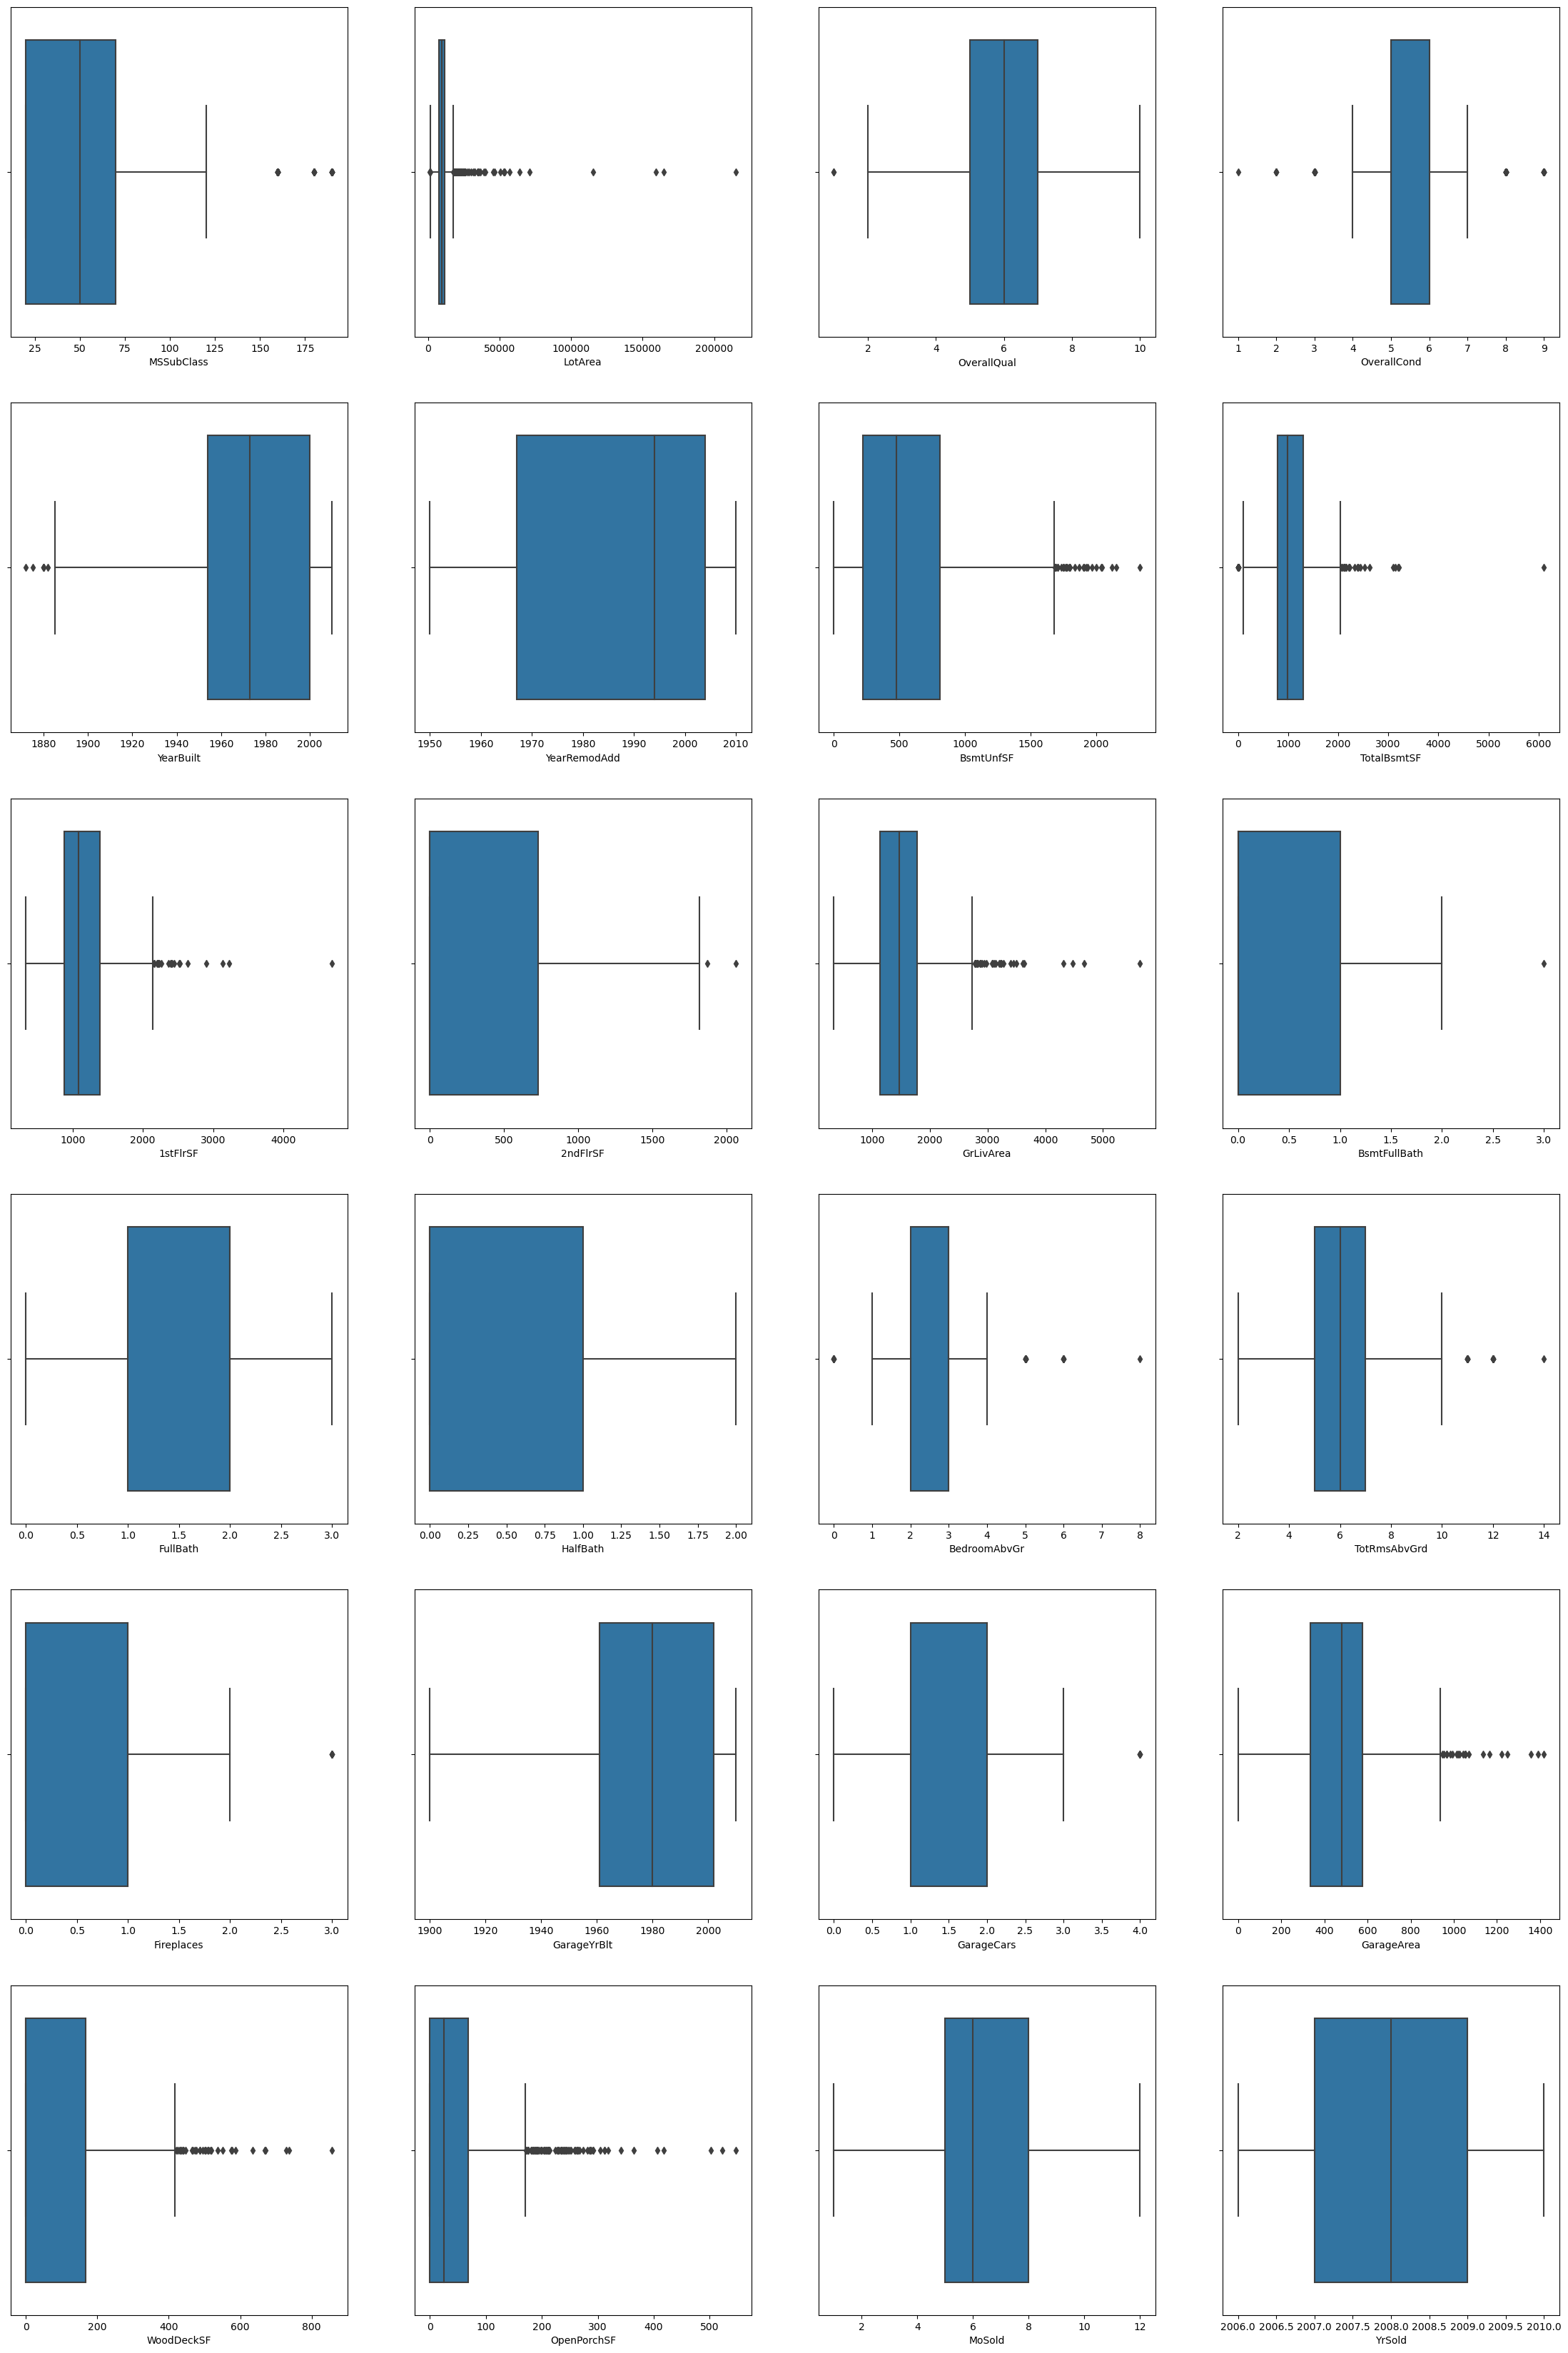

In [92]:
f,ax = plt.subplots(6,4, figsize=(28,42))
k=0
for i in range(6):
    for j in range(4):
        while k<24:
            sns.boxplot(x=cont_features[k], data=data_temp, ax=ax[i][j])
            break
        k=k+1

In [93]:
# Handling outliers via IQR (interquartile range)
def outliers(data_temp, k=3):
    q1, q3 = np.percentile(data_temp, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    outliers = [index for index,x in enumerate(data_temp) if x < lower_bound or x > upper_bound]
    
    return outliers

In [94]:
raws = []
for i in cont_features:
    raws += outliers(data_temp[i])

# No. of estimated Outliers
print(len(set(raws)))

67


In [95]:
#drop the outliers from the dataset
data_temp.drop(list(set(raws)), axis=0, inplace=True)

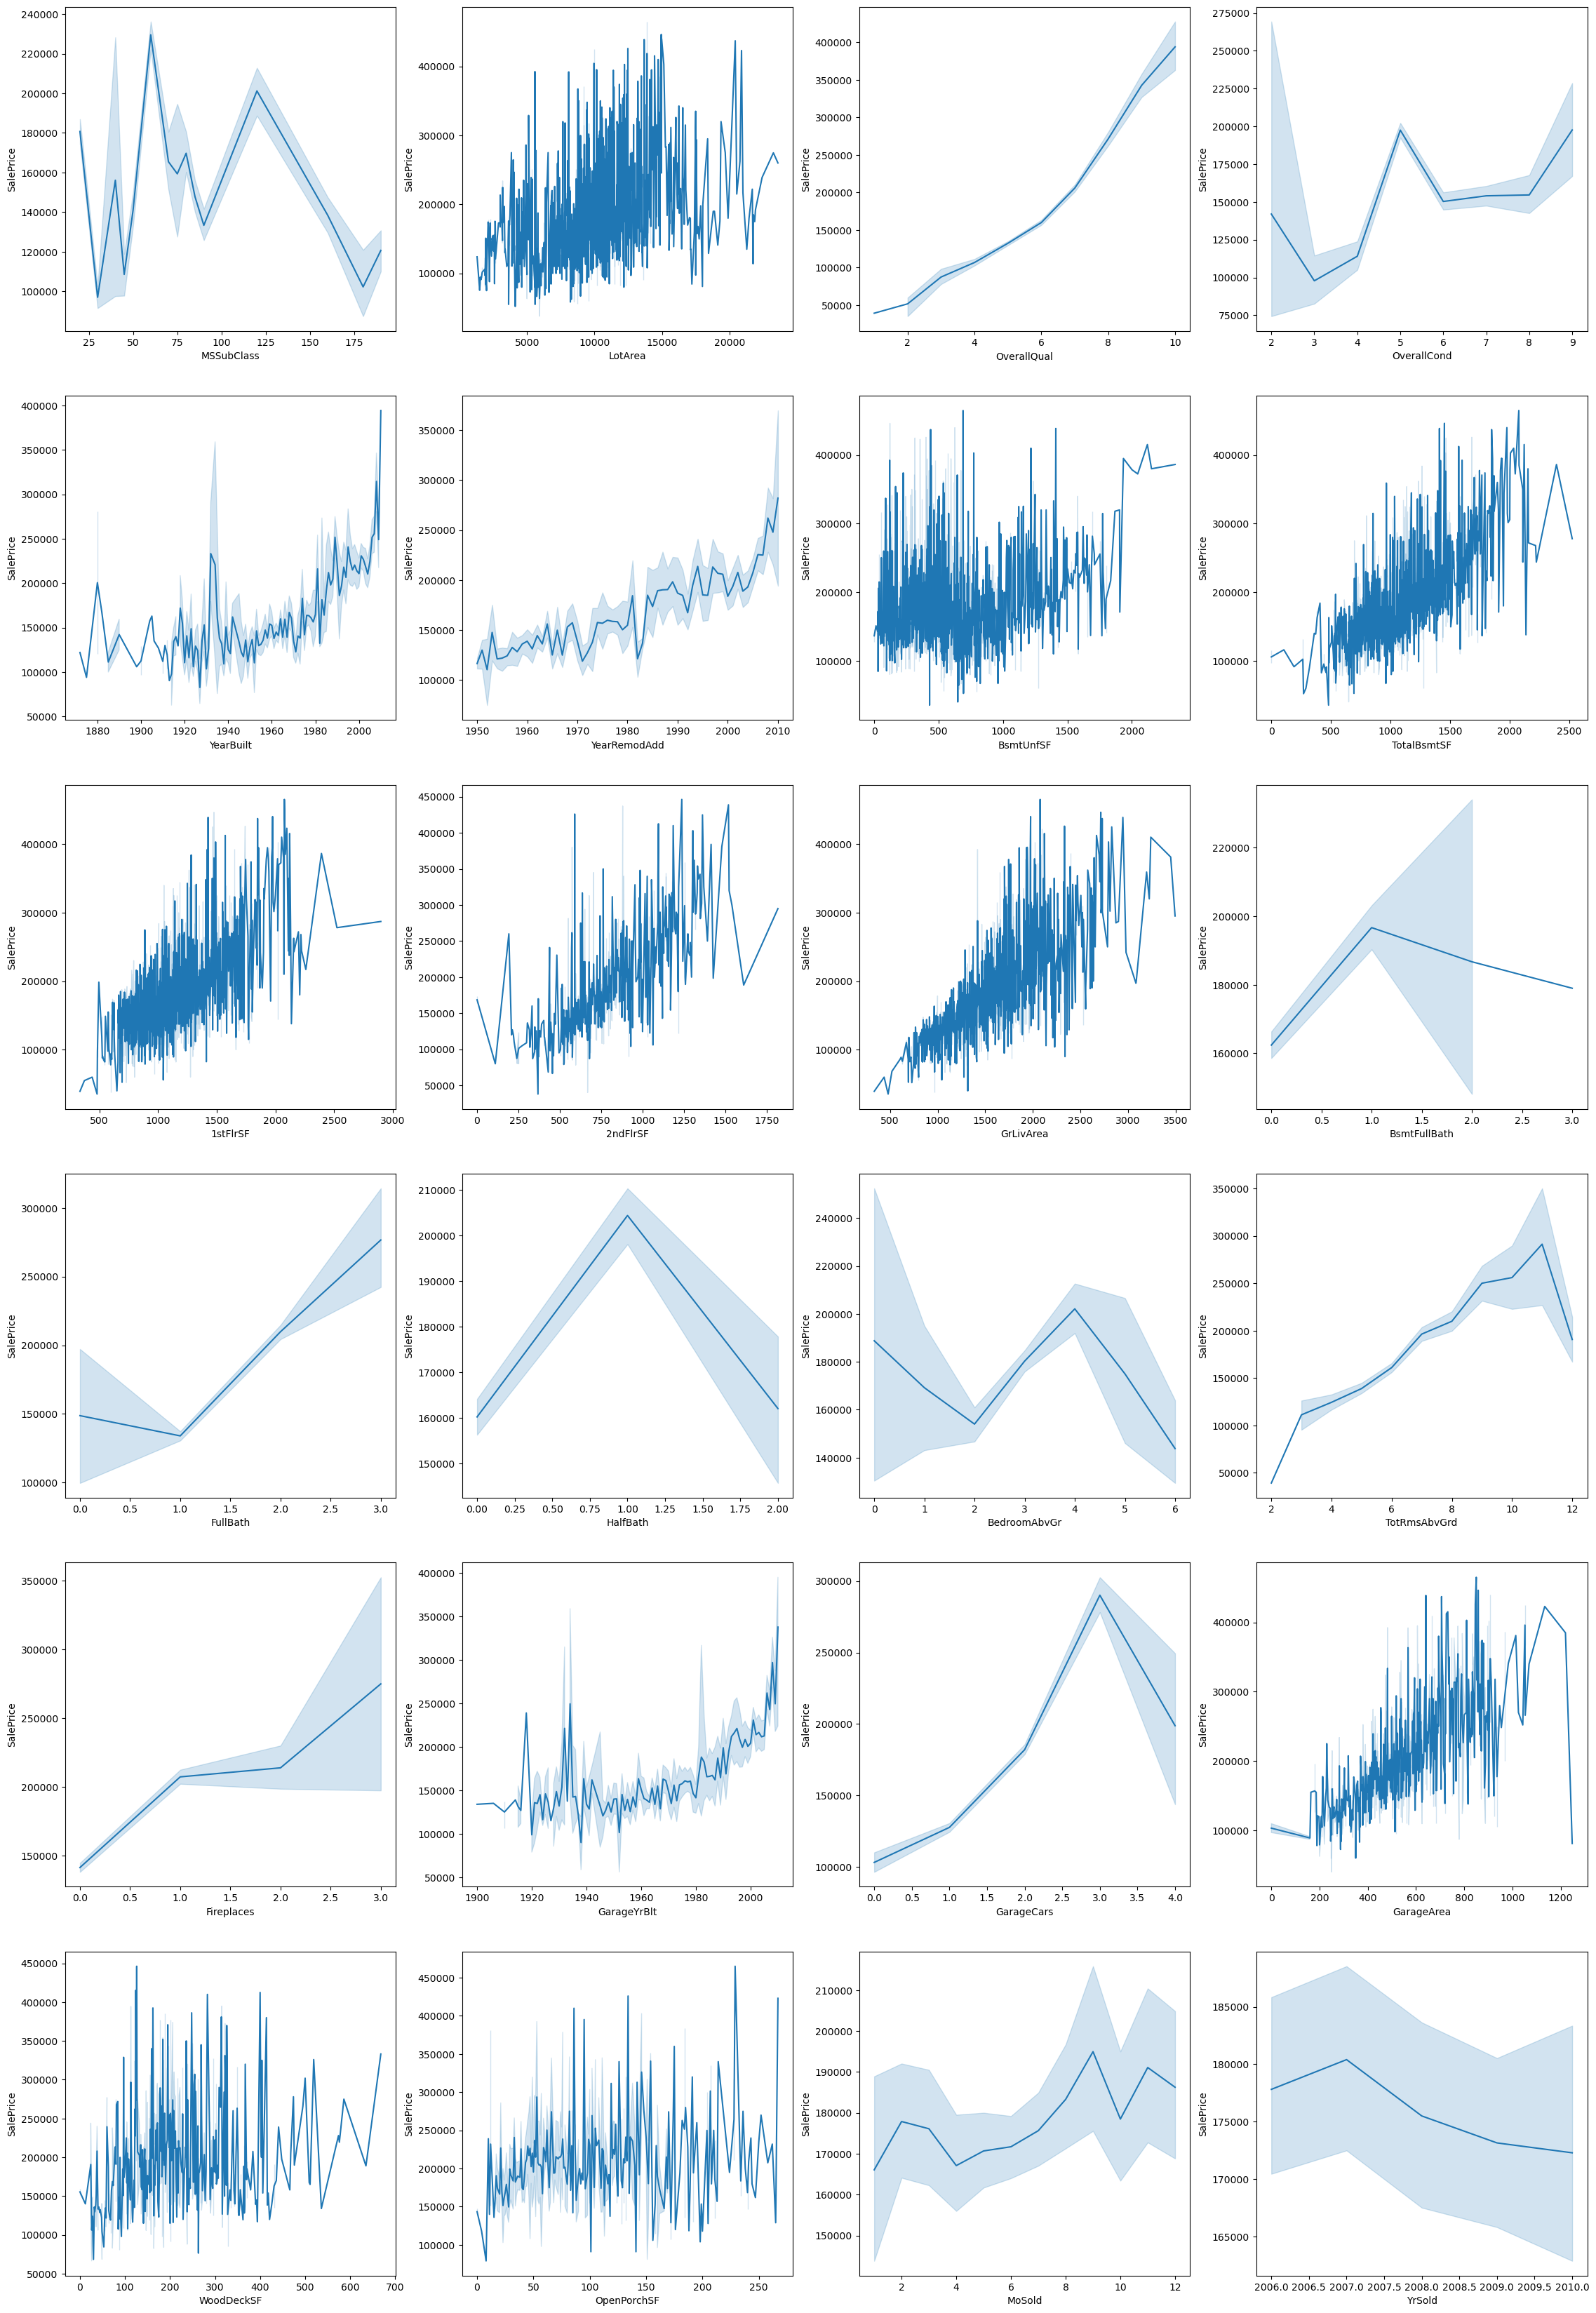

In [96]:
f,ax = plt.subplots(6,4, figsize=(28,42))
k=0
for i in range(6):
    for j in range(4):
        while k<24:
            sns.lineplot(x=cont_features[k], y='SalePrice', data=data_temp, ax=ax[i][j])
            break
        k=k+1

## Functional Analysis

Now that we've cleaned the data and removed outliers and less helpful features, we can 

In [97]:
X = data_temp.iloc[:, :-1]
y = data_temp['SalePrice']

In [98]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

<AxesSubplot:>

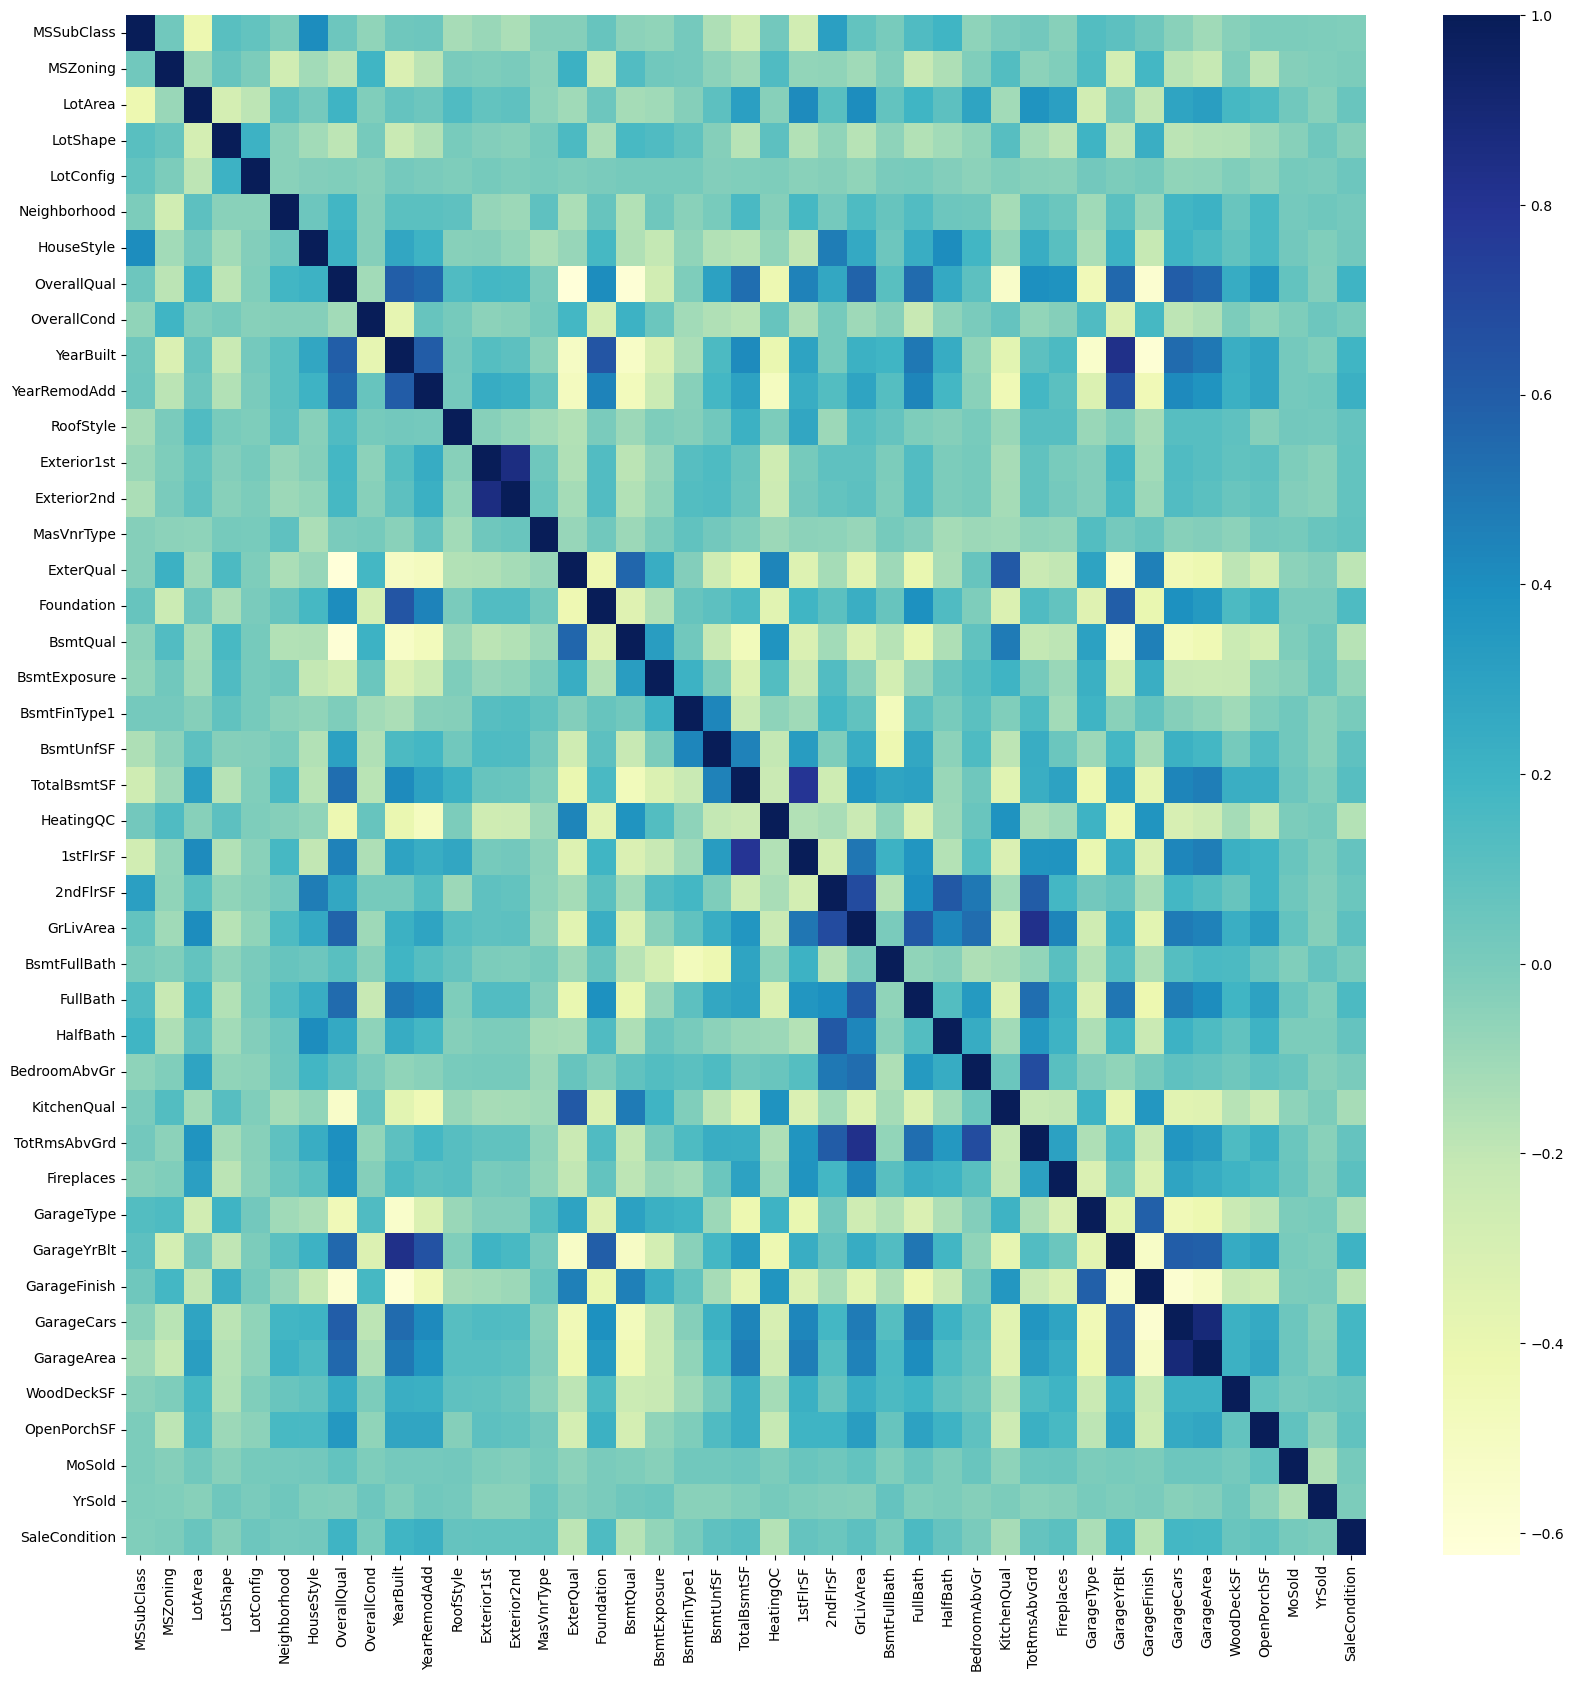

In [99]:
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    enc = LabelEncoder()
    X[i] =enc.fit_transform(X[i])

plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), cmap='YlGnBu')



In [100]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
X = imputer.fit_transform(X)

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linearregression', LinearRegression())
])

param_grid = {'linearregression__fit_intercept': [True, False],
              'linearregression__copy_X': [True, False]
              }

grid_search1 = GridSearchCV(pipeline1, param_grid, cv=12)
grid_search1.fit(X,y)

print('Parameters : ', grid_search1.best_params_,'\nAccuracy Score : ', grid_search1.best_score_)

Parameters :  {'linearregression__copy_X': True, 'linearregression__fit_intercept': True} 
Accuracy Score :  0.8876673132236107


## Decision Tree Regression

In [103]:
from sklearn.tree import DecisionTreeRegressor

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf2', DecisionTreeRegressor(random_state=42))
])

param_grid2 = {
    'clf2__max_depth': [2, 3, 4, 5],
    'clf2__min_samples_split': [2, 5, 10],
    'clf2__min_samples_leaf': [1, 2, 4],
    'clf2__max_leaf_nodes': [None, 5, 10, 20]
}

grid_search2 = GridSearchCV(pipeline2, param_grid2, cv=15)
grid_search2.fit(X,y)

print('Parameters : ', grid_search2.best_params_,'\nAccuracy Score : ', grid_search2.best_score_)

Parameters :  {'clf2__max_depth': 5, 'clf2__max_leaf_nodes': 20, 'clf2__min_samples_leaf': 4, 'clf2__min_samples_split': 2} 
Accuracy Score :  0.7604681557560394


## SVR

In [ ]:
from sklearn.svm import SVR

pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf3', SVR())
])

param_grid3 = {
    'clf3__C': [0.1, 1, 10, 100],
    'clf3__gamma': ['scale', 'auto', 0.1, 1, 10],
    'clf3__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search3 = GridSearchCV(pipeline3, param_grid3, cv=5)
grid_search3.fit(X,y)

print('Parameters : ', grid_search3.best_params_,'\nAccuracy Score : ', grid_search3.best_score_)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipeline5 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf5', RandomForestRegressor())
])

param_grid5 = {
    'clf5__n_estimators': [10, 50, 100],
    'clf5__max_features': ['auto', 'sqrt'],
    'clf5__max_depth': [5, 15],
    'clf5__min_samples_split': [2, 5],
    'clf5__min_samples_leaf': [1, 3],
}

grid_search5 = GridSearchCV(pipeline5, param_grid5, cv=10)
grid_search5.fit(X,y)

print('Parameters : ', grid_search5.best_params_,'\nAccuracy Score : ', grid_search5.best_score_)

## Comparison Chart

In [ ]:
sns.barplot(y = [grid_search1.best_score_,
                   grid_search2.best_score_,
                   grid_search3.best_score_,
                   grid_search5.best_score_], 
                  x=['Linear\nRegression','Decision\nTree','SVM','Random\nForest'])
plt.ylabel('Accuracy Score')
plt.xlabel('Classifiers')
plt.title('Model Comparison')
plt.show()

# Conclusion
In this project, we explored different supervised learning regression models to predict the sale prices of residential homes using the House Prices Advanced Regression Techniques Kaggle dataset. We started by performing exploratory data analysis and preprocessing the data, including handling missing values and encoding categorical variables. We then trained and evaluated multiple regression models, including linear regression, ridge regression, lasso regression, decision tree regressor, random forest regressor, and gradient boosting regressor.

Our evaluation metric was the Accuracy score, and we found that the Random Forest Regressor outperformed all other models, achieving an accuracy of 0.895 or 89.5%. The Random Forest model's superior performance can be attributed to its ability to handle non-linear relationships between features and the target variable, as well as its robustness to outliers and missing values.

In conclusion, we recommend using the Random Forest Regressor to predict the sale prices of residential homes based on the House Prices Advanced Regression Techniques Kaggle dataset. This model can provide accurate predictions and help buyers, sellers, and real estate agents make informed decisions about the pricing of properties. However, we also recommend that this model is further tuned and optimized by adjusting hyperparameters to improve its performance.